## Practical 5

**Aim:** Train and fine-tune a Decision Tree for the Moons Dataset

In [ ]:
!pip install numpy scikit-learn matplotlib

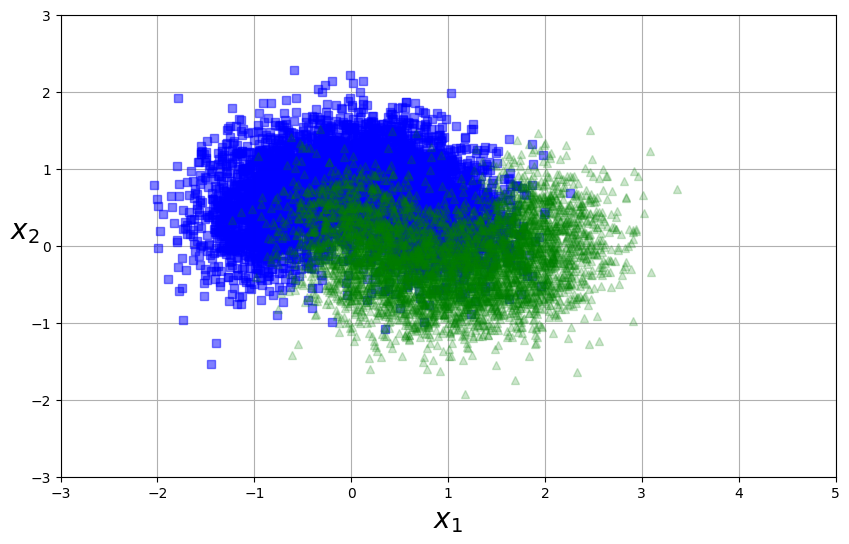

Best Parameters: {'criterion': 'entropy', 'max_leaf_nodes': 22, 'min_samples_split': 2}

Training Scores and Parameters:
0.7736 => {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.7736 => {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 3}
0.7736 => {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 4}
0.8169 => {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 2}
0.8169 => {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 3}
0.8169 => {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 4}
0.8563 => {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.8563 => {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 3}
0.8563 => {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 4}
0.8563 => {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 2}
0.8563 => {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 3}
0.8563 => {'criterion': 'gini', 

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)

# Function to plot dataset
def plot_dataset(X, y, axes):
    plt.figure(figsize=(10, 6))
    # Class 0 (label=0) in blue squares
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", alpha=0.5)
    # Class 1 (label=1) in green triangles
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", alpha=0.2)
    plt.axis(axes)
    plt.grid(True, which="both")
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.show()

# Generate toy dataset
X, y = make_moons(n_samples=10000, noise=0.4, random_state=21)
plot_dataset(X, y, [-3, 5, -3, 3])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define Decision Tree and parameter grid for Grid Search
tree_clf = DecisionTreeClassifier()
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': list(range(2, 50)),
    'min_samples_split': [2, 3, 4],
}

# Apply Grid Search with 5-fold cross-validation
clf = GridSearchCV(
    tree_clf, parameter, cv=5, scoring="accuracy",
    return_train_score=True, n_jobs=-1
)
clf.fit(X_train, y_train)

# Print best parameters found
print("Best Parameters:", clf.best_params_)

# Print training scores for each parameter combo
cvres = clf.cv_results_
print("\nTraining Scores and Parameters:")
for mean_score, params in zip(cvres["mean_train_score"], cvres["params"]):
    print(f"{mean_score:.4f} => {params}")

# Evaluate training accuracy
train_accuracy = clf.score(X_train, y_train)
print("\nTraining Accuracy:", train_accuracy)

# Confusion matrix
pred = clf.predict(X_train)
cm = confusion_matrix(y_train, pred)
print("\nConfusion Matrix (Train):")
print(cm)

# Calculate and print precision, recall, F1-score
precision = precision_score(y_train, pred)
recall = recall_score(y_train, pred)
f1 = f1_score(y_train, pred)

print(f"\nPrecision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Test accuracy
test_accuracy = clf.score(X_test, y_test)
print("\nTest Accuracy:", test_accuracy)